In [1]:
from pathlib import Path
import xarray as xr
import easygems.healpix as egh


In [2]:
egh.__all__

['get_nest',
 'get_nside',
 'get_npix',
 'get_extent_mask',
 'get_full_chunks',
 'isel_extent',
 'fix_crs',
 'attach_coords',
 'healpix_resample',
 'create_geoaxis',
 'get_current_geoaxis',
 'healpix_show',
 'healpix_contour']

In [3]:
loc = Path("/glade/derecho/scratch/brianpm/healpix/")

for zoom in range(1, 11):
    zfil = loc / f"test3_mpas_to_hp{zoom}.zarr"
    if zfil.exists():
        ds = xr.open_dataset(zfil)
        print(f"zoom = {zoom}, exist: {zfil.exists()}, {ds['ivt'].shape}")

zoom = 1, exist: True, (1, 48)
zoom = 2, exist: True, (1, 192)
zoom = 3, exist: True, (1, 768)
zoom = 4, exist: True, (1, 3072)
zoom = 5, exist: True, (1, 12288)
zoom = 6, exist: True, (1, 49152)
zoom = 7, exist: True, (1, 196608)
zoom = 8, exist: True, (1, 786432)
zoom = 9, exist: True, (1, 3145728)
zoom = 10, exist: True, (1, 12582912)


In [4]:
# ds = egh.attach_coords(ds)

In [5]:
xsample = ds['ivt'].squeeze()

print(f"Size of xsample: {xsample.size}, Units: {xsample.attrs.get("units", "NONE")}, Minimum: {xsample.min().item()}, Maximum: {xsample.max().item()}")

Size of xsample: 12582912, Units: kg m^{-1} s^{-1}, Minimum: 0.20545464754104614, Maximum: 4252.93017578125


<Figure size 640x480 with 0 Axes>

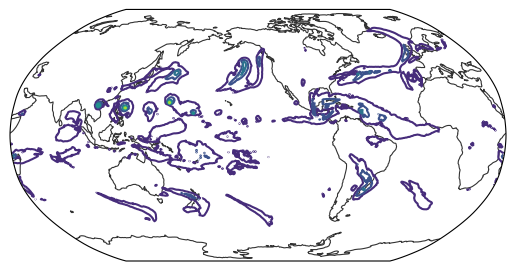

In [6]:
egh.healpix_contour(xsample)

In [7]:
# An improved contour method:
import numpy as np
from cartopy.util import add_cyclic_point

def healpix_contour_cyc(
    var, dpi=None, ax=None, method="linear", nest=True, add_coastlines=True, **kwargs
):
    if ax is None:
        ax = egh.get_current_geoaxis(add_coastlines=add_coastlines)
    fig = ax.get_figure()

    if dpi is not None:
        fig.set_dpi(dpi)

    _, _, nx, ny = np.array(ax.bbox.bounds, dtype=int)

    xlims = ax.get_xlim()
    ylims = ax.get_ylim()

    im = egh.healpix_resample(var, xlims, ylims, nx, ny, ax.projection, method, nest)
    # Add cyclic point
    cyclic_data, cyclic_lon = add_cyclic_point(im, coord=im.x)

    return ax.contour(cyclic_lon, im.y, cyclic_data, **kwargs)


def healpix_contourf_cyc(
    var, dpi=None, ax=None, method="linear", nest=True, add_coastlines=True, **kwargs
):
    if ax is None:
        ax = egh.get_current_geoaxis(add_coastlines=add_coastlines)
    fig = ax.get_figure()

    if dpi is not None:
        fig.set_dpi(dpi)

    _, _, nx, ny = np.array(ax.bbox.bounds, dtype=int)

    xlims = ax.get_xlim()
    ylims = ax.get_ylim()

    im = egh.healpix_resample(var, xlims, ylims, nx, ny, ax.projection, method, nest)
    # Add cyclic point
    cyclic_data, cyclic_lon = add_cyclic_point(im, coord=im.x)

    return ax.contourf(cyclic_lon, im.y, cyclic_data, **kwargs)



NameError: name 'arr' is not defined

<Figure size 640x480 with 0 Axes>

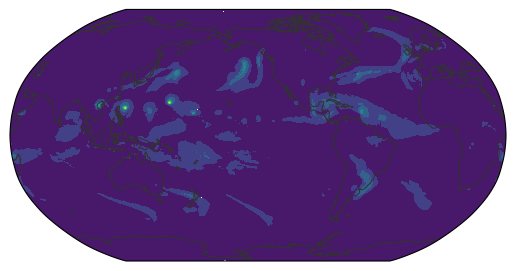

In [8]:
healpix_contourf_cyc(xsample)
# add_cyclic_point?

print(arr)
print(arr.max())

(np.float64(-8625154.6651), np.float64(8625154.6651))

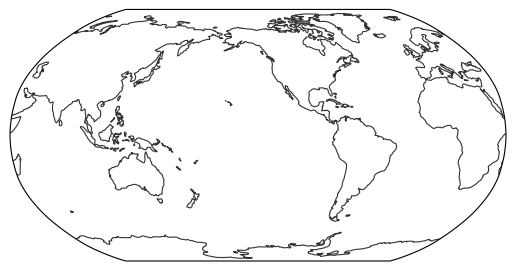

In [ ]:
myaxis = egh.create_geoaxis(add_coastlines=True)

myaxis.get_xlim()
myaxis.get_ylim()

In [ ]:

egh.isel_extent(egh.attach_coords(ds), (10, 90, -45, 45))

IndexError: boolean index did not match indexed array along axis 0; size of axis is 12582912 but size of corresponding boolean axis is 192

In [ ]:
# ds.get("cell")

egh.get_nest(ds)


# dsll = egh.attach_coords(ds)

True

In [ ]:
# egh.isel_extent(dsll, (10, 90, -45, 45))
lons, lats = egh.healpix.pix2ang(egh.get_nside(ds), ds.get('cell'), nest=egh.get_nest(ds), lonlat=True)

In [ ]:
egh.get_nside(ds)

1024

In [ ]:
egh.healpix.pix2ang(np.array([1, 2, 4, 8]), 11, nest=True, lonlat=True)

TypeError: only integer scalar arrays can be converted to a scalar index